dataset link= https://www.kaggle.com/datasets/rakeshrau/social-network-ads

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, fbeta_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import joblib

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
data["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [21]:
# Label Encoding
label_encoding = LabelEncoder()
data["Gender"] = label_encoding.fit_transform(data["Gender"])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [33]:
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Shape x_train {x_train.shape}")
print(f"Training Target Shape x_train {y_train.shape}")
print(f"Testing Data Shape x_train {x_test.shape}")
print(f"Testing Target Shape x_train {y_test.shape}")

Training Data Shape x_train (320, 3)
Training Target Shape x_train (320,)
Testing Data Shape x_train (80, 3)
Testing Target Shape x_train (80,)


## Model Training

In [52]:
dt_classifier = DecisionTreeClassifier(class_weight="balanced", splitter="random", random_state=42)
dt_classifier.fit(x_train, y_train)
dt_pred = dt_classifier.predict(x_test)

In [53]:
print(f"Model Accuracy: {round(accuracy_score(y_test, dt_pred),2)}%")
print(f"Model F1 Score: {f1_score(y_test, dt_pred)}%")

Model Accuracy: 0.89%
Model F1 Score: 0.8363636363636364%


AxesSubplot(0.125,0.11;0.62x0.77)


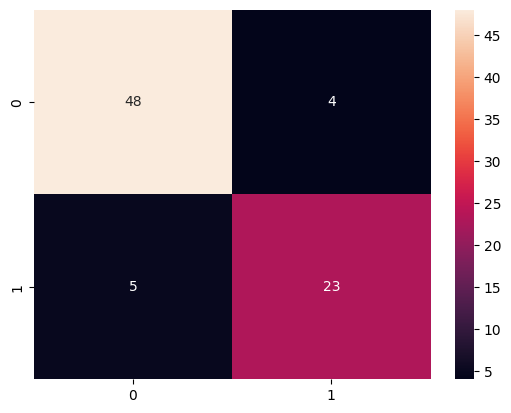

In [55]:
print(sns.heatmap(confusion_matrix(y_test, dt_pred),annot=True))

In [59]:
# Fine Tuning 

results = {}

## Fine Tuning
for depth in range(3, 51):
    model = DecisionTreeClassifier(
    class_weight="balanced", splitter="random", max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    f2score = fbeta_score(y_test, ypred, beta=2.0)
    
    print(f"Max Depth: {depth}")
    print(f"F Score: {f2score}")
    
    results[depth] = f2score

Max Depth: 3
F Score: 0.653846153846154
Max Depth: 4
F Score: 0.8928571428571429
Max Depth: 5
F Score: 0.7462686567164178
Max Depth: 6
F Score: 0.851063829787234
Max Depth: 7
F Score: 0.8098591549295774
Max Depth: 8
F Score: 0.8156028368794327
Max Depth: 9
F Score: 0.851063829787234
Max Depth: 10
F Score: 0.851063829787234
Max Depth: 11
F Score: 0.8865248226950354
Max Depth: 12
F Score: 0.7352941176470589
Max Depth: 13
F Score: 0.827338129496403
Max Depth: 14
F Score: 0.8214285714285714
Max Depth: 15
F Score: 0.827338129496403
Max Depth: 16
F Score: 0.827338129496403
Max Depth: 17
F Score: 0.827338129496403
Max Depth: 18
F Score: 0.827338129496403
Max Depth: 19
F Score: 0.827338129496403
Max Depth: 20
F Score: 0.827338129496403
Max Depth: 21
F Score: 0.827338129496403
Max Depth: 22
F Score: 0.827338129496403
Max Depth: 23
F Score: 0.827338129496403
Max Depth: 24
F Score: 0.827338129496403
Max Depth: 25
F Score: 0.827338129496403
Max Depth: 26
F Score: 0.827338129496403
Max Depth: 27
F 

In [60]:
best_depth = sorted(results, key=lambda x: results[x], reverse=True)[0]
print(f"Best Depth: {best_depth}")

Best Depth: 4


In [61]:
dt_tuned_model = DecisionTreeClassifier(class_weight="balanced", splitter='random', max_depth=best_depth, random_state=42)

Model Accuracy: 0.92%
Model F1 Score: 0.8928571428571429%

Classification Report: Train set

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       205
           1       0.85      0.82      0.84       115

    accuracy                           0.88       320
   macro avg       0.88      0.87      0.87       320
weighted avg       0.88      0.88      0.88       320

Classification Report: Test set

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80

Confusion Matrix: Train set



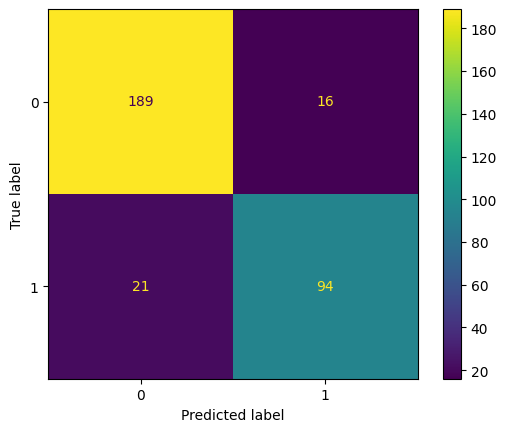

Confusion Matrix: Test set



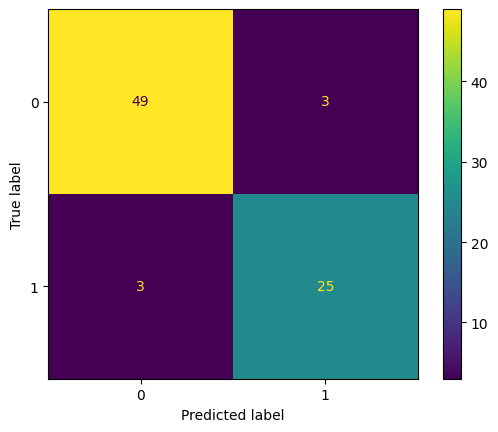

In [73]:
dt_tuned_model.fit(x_train, y_train)
y_train_pred = dt_tuned_model.predict(x_train)
y_test_pred = dt_tuned_model.predict(x_test)

print(f"Model Accuracy: {round(accuracy_score(y_test, y_test_pred),2)}%")
print(f"Model F1 Score: {f1_score(y_test, y_test_pred)}%\n")

print("Classification Report: Train set\n")
print(classification_report(y_train, y_train_pred))

print("Classification Report: Test set\n")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix: Train set\n")
print(ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred))
plt.grid(False)
plt.show()

print("Confusion Matrix: Test set\n")
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))
plt.grid(False)
plt.show()


## Saving the Model

In [74]:
# saving the model
final_model = joblib.dump(dt_tuned_model,"dt_tuned_model.joblib")

In [76]:
x_train.head()

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000


## Testing the model

In [81]:
# Load the model
testing_model = joblib.load("dt_tuned_model.joblib")

In [94]:
sample_data = [{"Gender":1,
              "Age":20,
              "EstimatedSalary":57000}]

testing_sample = pd.DataFrame(sample_data)
testing_sample.head()
print(testing_sample.T,'\n')

test = testing_model.predict(testing_sample)
result = "No" if test==0 else "Yes"
print(f"result:{result}")

                     0
Gender               1
Age                 20
EstimatedSalary  57000 

result:No
